In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer

In [4]:
%cd /Users/alex/PETsARD

/Users/alex/PETsARD


In [5]:
salaries = pd.read_csv('salaries.csv')

In [6]:
salaries.shape[0]

10417

## Descriptive Analysis

In [7]:
salaries.salary_in_usd.describe()

count     10417.000000
mean     149354.812902
std       65272.683542
min       15000.000000
25%      104663.000000
50%      142200.000000
75%      185900.000000
max      750000.000000
Name: salary_in_usd, dtype: float64

In [8]:
for q in np.arange(0.75, 1.01, 0.05):
    print(f'The {round(q * 100)}% salary is {salaries.salary_in_usd.quantile(round(q, 2))}')

The 75% salary is 185900.0
The 80% salary is 200000.0
The 85% salary is 212800.0
The 90% salary is 234000.0
The 95% salary is 260000.0
The 100% salary is 750000.0


In [9]:
for q in np.arange(0.95, 1.00, 0.01):
    print(f'The {round(q * 100)}% salary is {salaries.salary_in_usd.quantile(round(q, 2))}')

The 95% salary is 260000.0
The 96% salary is 275000.0
The 97% salary is 286780.00000000064
The 98% salary is 300000.0
The 99% salary is 329952.00000000006
The 100% salary is 750000.0


<Axes: >

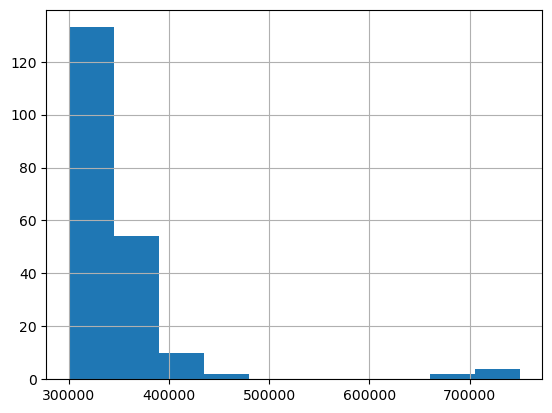

In [10]:
salaries.loc[salaries.salary_in_usd > 300000, 'salary_in_usd'].hist()

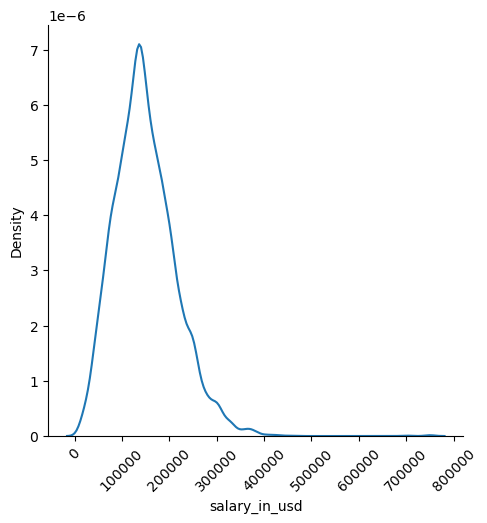

In [11]:
sns.displot(salaries.salary_in_usd, kind='kde')
plt.xticks(rotation=45)
plt.show()

## Synthesise without `log` transformation

In [12]:
st_md = SingleTableMetadata()
st_md.detect_from_dataframe(salaries)

In [13]:
syn = GaussianCopulaSynthesizer(st_md)

In [14]:
syn.fit(salaries)

In [15]:
sdata = syn.sample(salaries.shape[0])

/Users/alex/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:701: RuntimeWarning: invalid value encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [16]:
sdf = pd.DataFrame({'source': ['original'] * 10417 + ['synthesized'] * 10417, 'salary': pd.concat([salaries.salary_in_usd, sdata.salary_in_usd], axis=0)})

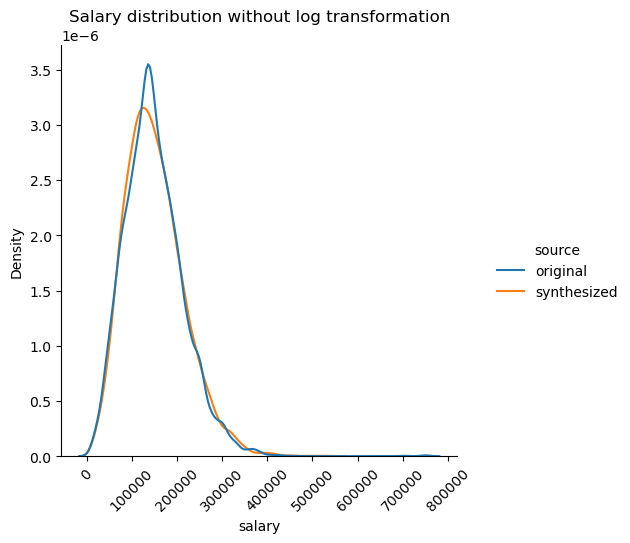

In [17]:
sns.displot(sdf, x='salary', hue='source', kind='kde')
plt.xticks(rotation=45)
plt.title('Salary distribution without log transformation')
plt.show()

## Synthesise with `log` transformation

In [18]:
salaries_log = salaries.copy()

In [19]:
salaries_log.loc[:, 'salary'] = salaries_log.salary.apply(np.log)
salaries_log.loc[:, 'salary_in_usd'] = salaries_log.salary_in_usd.apply(np.log)

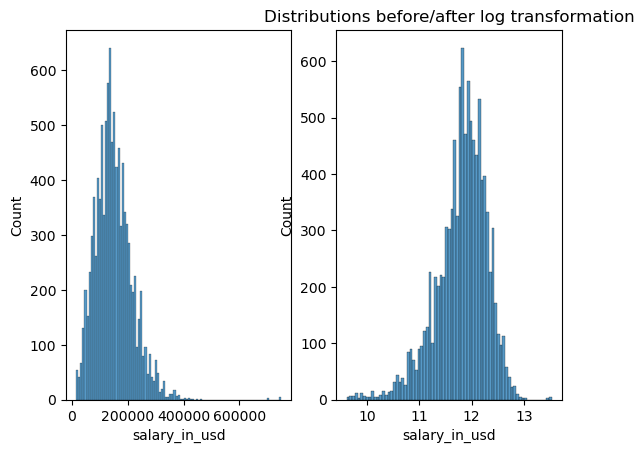

In [20]:
fig, ax = plt.subplots(1, 2)
sns.histplot(salaries.salary_in_usd, ax=ax[0])
sns.histplot(salaries_log.salary_in_usd, ax=ax[1])
plt.title('Distributions before/after log transformation')
plt.show()

In [21]:
st_md2 = SingleTableMetadata()
st_md2.detect_from_dataframe(salaries_log)

In [22]:
syn2 = GaussianCopulaSynthesizer(st_md2)

In [23]:
syn2.fit(salaries_log)

In [24]:
sdata2 = syn.sample(salaries_log.shape[0])

/Users/alex/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:701: RuntimeWarning: invalid value encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [25]:
sdata2.loc[:, 'salary'] = sdata2.salary.apply(np.exp)
sdata2.loc[:, 'salary_in_usd'] = sdata2.salary_in_usd.apply(np.exp)

In [26]:
sdf2 = pd.DataFrame({'source': ['original'] * 10417 + ['synthesized'] * 10417, 'salary': pd.concat([salaries.salary_in_usd, sdata2.salary_in_usd], axis=0)})

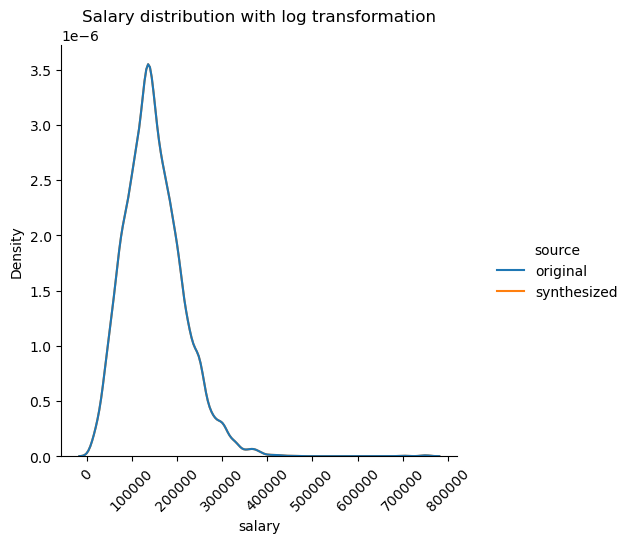

In [27]:
sns.displot(sdf2, x='salary', hue='source', kind='kde')
plt.xticks(rotation=45)
plt.title('Salary distribution with log transformation')
plt.show()